### Data Manipulation Source Code For Relationship Between Store Trading Duration and Revenue
Imported required libraries

In [31]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Defined required SSMS connection properties using python's open database connectivity pyodbc 

In [32]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=ENRIQUE_PC;'
                      'Database=AdventureWorks2019;'
                      'Trusted_Connection=yes;')

In [33]:
cursor = conn.cursor()

##### SQL query

In [34]:
#query = 'SELECT s.Name, s.YearOpened, s.AnnualRevenue as TOTALREVENUE , (2022-YearOpened) as Duration, AVG(s.AnnualRevenue) as avg_rev FROM Sales.vStoreWithDemographics as s GROUP BY s.YearOpened, s.AnnualRevenue, s.Name'
query = 'SELECT * FROM StoreTradingDurationRevenue;'

##### Execute SQL query and store the result in a DataFrame

In [35]:
salesdata = pd.read_sql(query, conn)

C:\Users\eagua\AppData\Local\Temp\ipykernel_14536\1111421933.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salesdata = pd.read_sql(query, conn)


#### Print the DataFrame

In [36]:
print(salesdata)

                         Name  YearOpened  TOTALREVENUE  Duration   avg_rev
0                A Bike Store        1970       30000.0        52   30000.0
1    Blue-Ribbon Bike Company        1970       30000.0        52   30000.0
2       Extras Sporting Goods        1970       30000.0        52   30000.0
3            Field Trip Store        1970       30000.0        52   30000.0
4           First Cycle Store        1970       30000.0        52   30000.0
..                        ...         ...           ...       ...       ...
696     Trusted Catalog Store        2001      100000.0        21  100000.0
697              Unique Bikes        2001      100000.0        21  100000.0
698     Urban Sports Emporium        2001      100000.0        21  100000.0
699    West Wind Distributors        2001      100000.0        21  100000.0
700    Yellow Bicycle Company        2001      100000.0        21  100000.0

[701 rows x 5 columns]


##### Plotting with Seaborn

In [37]:
sns.set(style="whitegrid")  # Setting the style
plt.figure(figsize=(10, 6))  # Setting the figure size

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


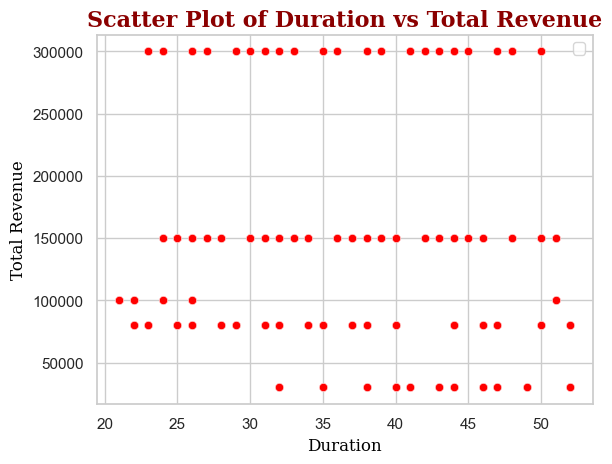

In [38]:
sns.scatterplot(data=salesdata, x='Duration', y='TOTALREVENUE', color='red', alpha=0.7)
title_font = {'family': 'serif', 'color':  'darkred', 'weight': 'bold', 'size': 16,}
label_font = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 12,}
plt.title('Scatter Plot of Duration vs Total Revenue', fontdict=title_font)
plt.xlabel('Duration', fontdict=label_font)
plt.ylabel('Total Revenue', fontdict=label_font)
plt.legend(loc='best')
plt.show()

Input SQL query to get the appropriate tables from AdventureWorks database

In [39]:
query = 'SELECT s.Name AS StoreName, MONTH(soh.OrderDate) AS OrderMonth, SUM(soh.TotalDue) AS YearlyRevenue FROM Sales.SalesOrderHeader soh JOIN Sales.SalesOrderDetail sod ON soh.SalesOrderID = sod.SalesOrderID JOIN sales.Customer c ON soh.CustomerID = c.CustomerID JOIN Person.BusinessEntity be ON c.StoreID = be.BusinessEntityID JOIN Sales.Store s ON be.BusinessEntityID = s.BusinessEntityID GROUP BY s.Name, c.StoreID, OrderDate ORDER BY c.StoreID, OrderMonth DESC;'

Load the queried table as a pandas dataframe for analysis and plotting

In [40]:
sales_data = pd.read_sql(query, conn)

C:\Users\eagua\AppData\Local\Temp\ipykernel_14536\499444787.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_data = pd.read_sql(query, conn)


In [41]:
sales_data.head()

,StoreName,OrderMonth,YearlyRevenue
0,Next-Door Bike Store,10,1.246748e+06
1,Next-Door Bike Store,8,4.560286e+03
2,Next-Door Bike Store,7,1.142626e+06
3,Next-Door Bike Store,4,1.439148e+03
4,Next-Door Bike Store,4,1.525666e+06


Manipulating the dataset to group yearly revenue by monthly order

In [42]:
sales_data = sales_data.groupby('OrderMonth').sum('YearlyRevenue')

In [43]:
month = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec' ]

Adding a new column to the dataframe to indicate month of the year

In [44]:
sales_data['Month'] = month
sales_data

,YearlyRevenue,Month
OrderMonth,,
1,1.772580e+08,Jan
2,9.816850e+07,Feb
3,3.761527e+08,March
4,1.066508e+08,April
5,3.833237e+08,May
6,3.618226e+08,June
7,3.562683e+08,July
8,2.030349e+08,Aug
9,2.525556e+08,Sept


Plot showing relationship between months of the year and yearly revenue using seaborn

C:\Users\eagua\AppData\Local\Temp\ipykernel_14536\1367032271.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_y_ticks, fontsize=11)


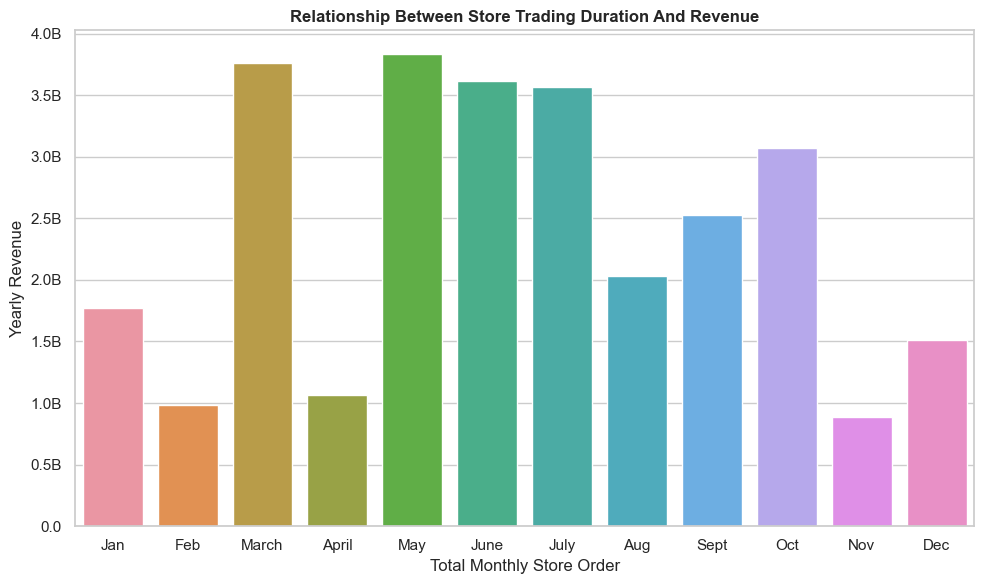

In [45]:
# set and initiate the plot grid and figuresize
plt.figure(figsize=(10, 6))
ax = sns.set_style("whitegrid")

# select an appropriate plot
sns.barplot(data=sales_data, x='Month', y='YearlyRevenue')

# set the axis labels and title
plt.xlabel('Total Monthly Store Order', fontsize=12)
plt.ylabel('Yearly Revenue', fontsize=12)
plt.title('Relationship Between Store Trading Duration And Revenue', fontweight='bold')

# reorder the y-axis tixks to be reader friendly
ax = plt.gca()
new_y_ticks = ['0.0', '0.5B', '1.0B', '1.5B', '2.0B', '2.5B', '3.0B', '3.5B', '4.0B', '4.5B']
ax.set_yticklabels(new_y_ticks, fontsize=11)
plt.tight_layout()